In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
datapath = 'data/modified/'
csv_file_nonet = datapath + 'C1W1 and C1W2 NonNetwork Data.csv'
csv_file_net = datapath + 'C1W1 C1W2 With Network No NickInit.csv'

df_nonet = pd.read_csv(csv_file_nonet)
df_net = pd.read_csv(csv_file_net)

In [3]:
fields = list(df_net.columns)
C1W1nonet_idx, C1W1nonet_vars = [], []
C1W2nonet_idx, C1W2nonet_vars = [], []
C1W1net_idx, C1W1net_vars = [], []

for field in fields:
    if field[5:7] != 'NS' and field[5:8] != 'NDX' and field[5:] != 'ND1':  # non-network
        if field[0:4] == 'C1W1':
            if field[5:] == 'ND1.1':  # there are 2 variables of same name 'C1W1_ND1', this is non-network one
                C1W1nonet_vars.append('ND1')
            else:
                C1W1nonet_vars.append(field[5:])
            C1W1nonet_idx.append(fields.index(field))
        elif field[0:4] == 'C1W2':
            C1W2nonet_vars.append(field[5:])
            C1W2nonet_idx.append(fields.index(field))
    else:
        if field[0:4] == 'C1W1':
            C1W1net_vars.append(field[5:])
            C1W1net_idx.append(fields.index(field))

df_C1W1nonet = df_net.iloc[:,C1W1nonet_idx]
df_C1W2nonet = df_net.iloc[:,C1W2nonet_idx]
df_C1W1net = df_net.iloc[:,C1W1net_idx]

# Remove prefixes from column names
df_C1W1nonet.columns = C1W1nonet_vars
df_C1W2nonet.columns = C1W2nonet_vars
df_C1W1net.columns = C1W1net_vars

In [22]:
# df_C1W1nonet.to_csv('C1W1_nonnetwork.csv', index=False)
# df_C1W2nonet.to_csv('C1W2_nonnetwork.csv', index=False)

In [23]:
len(list(df_C1W1nonet.columns))

199

In [13]:
f1 = datapath + "C1W1_nonnetwork.txt"  # wave 1, non-network
f2 = datapath + "C1W2_nonnetwork.txt"  # wave 2, non-network
f3 = datapath + "C1W1_network.txt"  # wave 1, network

varnames, descrs = [], []
with open(f1, 'r') as file:  # read from C1W1
    while (line := file.readline().rstrip()):  # go over each line
        chars = line.split()
        varnames.append(chars[0])
        descrs.append(' '.join(chars[1:]))

In [25]:
mappings = {}  # mappings of non-network variables between C1W1 and C1W2
with open(f2, 'r') as file:  # read from C1W2
    i = 0  # keep track of column index of C1W2 vars i.e., line number in f2
    while (line := file.readline().rstrip()):  # go over each line
        chars = line.split()
        descr = ' '.join(chars[1:])
        if descr in descrs:
            mappings[varnames[descrs.index(descr)]] = (chars[0], descr, descrs.index(descr), i)
        i += 1

Each key is the variable name in wave 1, each corresponding value is a 3-tuple, where the first element is the variable name in wave 2, followed by the description as the second element, and the last 2 elements are pair of column indices  in wave 1 and 2's dataframes, respectively.

In [26]:
print(len(mappings))
mappings

151


{'SC1': ('Q1', 'years lived in current community', 2, 3),
 'SC3': ('Q3',
  'how satisfied/dissatisfied with living in current community (the higher the more satisfied)',
  3,
  4),
 'SC4': ('Q4',
  'think whether will still be living in current community two years into the future (no/yes)',
  4,
  5),
 'SC5': ('Q5',
  'how often felt like belong in community in the past 6 months (the higher the more often)',
  5,
  6),
 'SC6': ('Q6',
  'how often felt out of place in community in the past 6 months (the higher the more often)',
  6,
  7),
 'SC8': ('Q8',
  'whether there is at least one person to confide in (no/yes)',
  7,
  8),
 'SC9': ('Q9',
  'whether there is someone in life to receive emotional support from (no/yes)',
  8,
  9),
 'SC13': ('Q13',
  'whether there is someone who would give financial assistance (no/yes)',
  9,
  10),
 'DM1': ('Q15', 'age', 10, 11),
 'TB1': ('Q19', 'whether regularly smoked cigarettes before (no/yes)', 11, 12),
 'TB2': ('Q20',
  'how old first time smok

In [29]:
val = mappings['TB3*']
a = df_C1W1nonet.iloc[:,val[2]]
b = df_C1W2nonet.iloc[:,val[3]]
for j in range(len(df_C1W1nonet.index)):
    print(f'{a[j]}, {type(a[j])}, {b[j]}, {type(b[j])}')
# [type(x) for x in b]


1.0, <class 'numpy.float64'>, 1.0, <class 'numpy.float64'>
1.0, <class 'numpy.float64'>, 1.0, <class 'numpy.float64'>
0.0, <class 'numpy.float64'>, nan, <class 'numpy.float64'>
1.0, <class 'numpy.float64'>, 1.0, <class 'numpy.float64'>
1.0, <class 'numpy.float64'>, 1.0, <class 'numpy.float64'>
1.0, <class 'numpy.float64'>, 1.0, <class 'numpy.float64'>
1.0, <class 'numpy.float64'>, 1.0, <class 'numpy.float64'>
1.0, <class 'numpy.float64'>, 1.0, <class 'numpy.float64'>
1.0, <class 'numpy.float64'>, 1.0, <class 'numpy.float64'>
1.0, <class 'numpy.float64'>, 1.0, <class 'numpy.float64'>
1.0, <class 'numpy.float64'>, 1.0, <class 'numpy.float64'>
1.0, <class 'numpy.float64'>, 1.0, <class 'numpy.float64'>
1.0, <class 'numpy.float64'>, 1.0, <class 'numpy.float64'>
0.0, <class 'numpy.float64'>, nan, <class 'numpy.float64'>
1.0, <class 'numpy.float64'>, 1.0, <class 'numpy.float64'>
1.0, <class 'numpy.float64'>, 1.0, <class 'numpy.float64'>
1.0, <class 'numpy.float64'>, 1.0, <class 'numpy.float64

In [30]:
def plot_hist(key):
    val = mappings[key]
    fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
    plt.suptitle(key)
    axs[0].hist(df_C1W1nonet.iloc[:,val[2]],bins=20)
    axs[1].hist(df_C1W2nonet.iloc[:,val[3]],bins=20)

Histograms of variables available in both waves

/tmp/ipykernel_1057/4102971773.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)


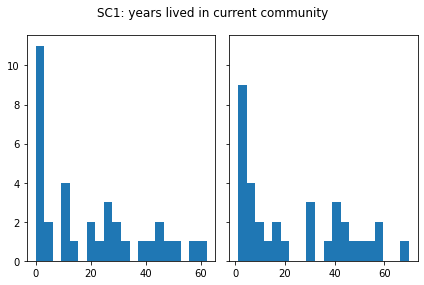

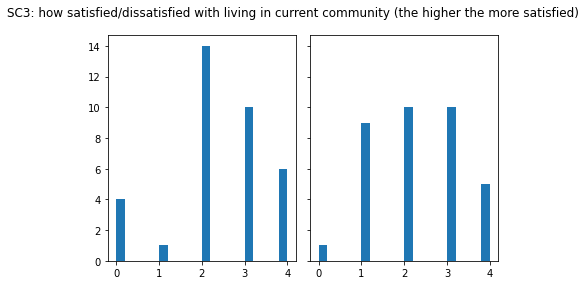

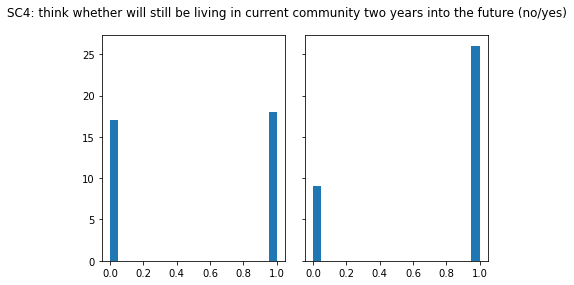

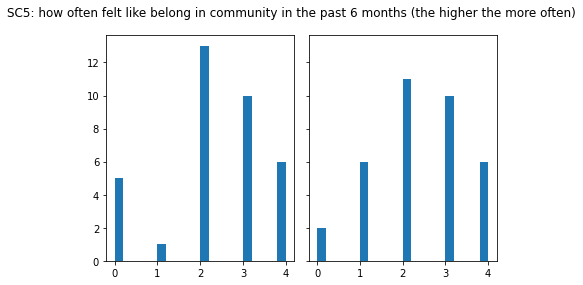

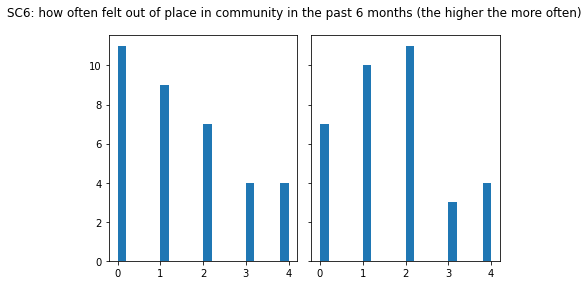

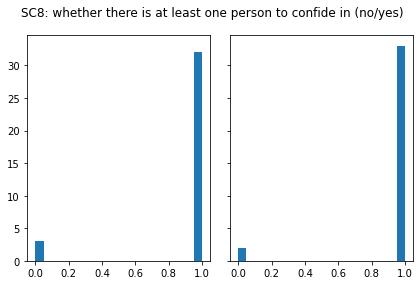

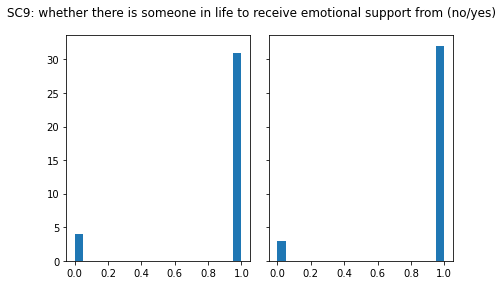

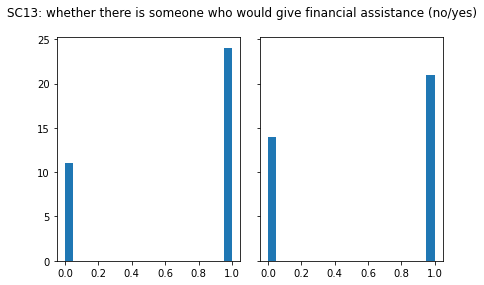

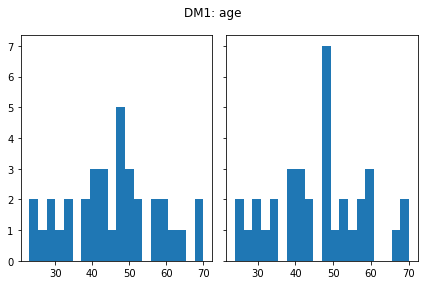

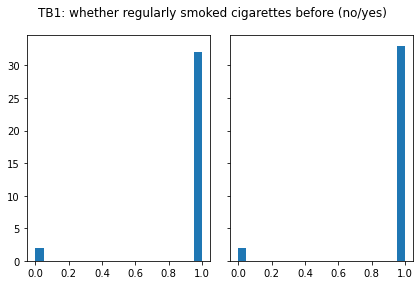

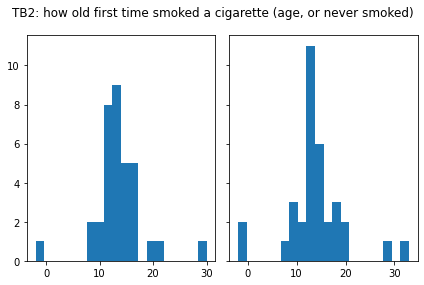

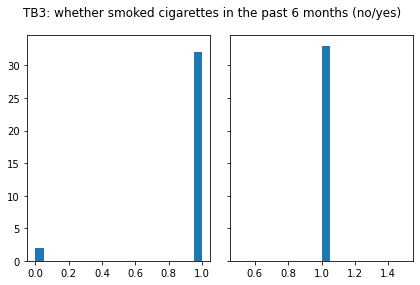

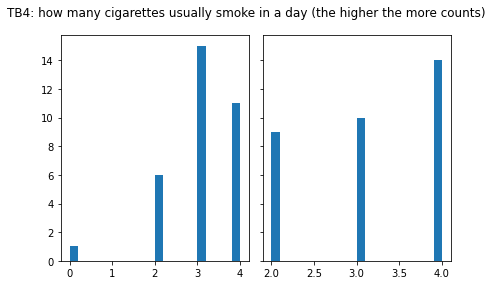

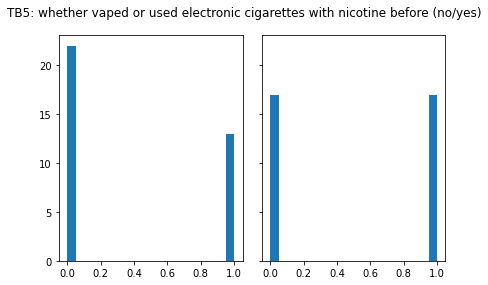

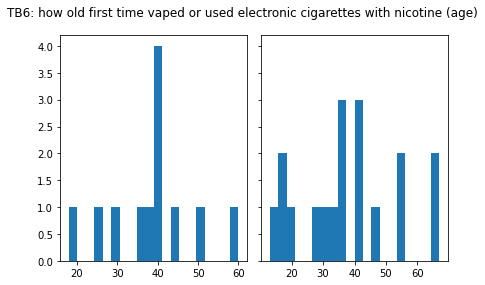

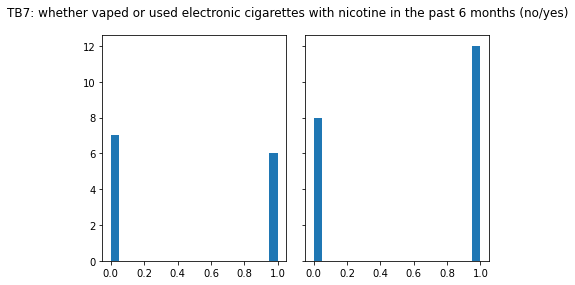

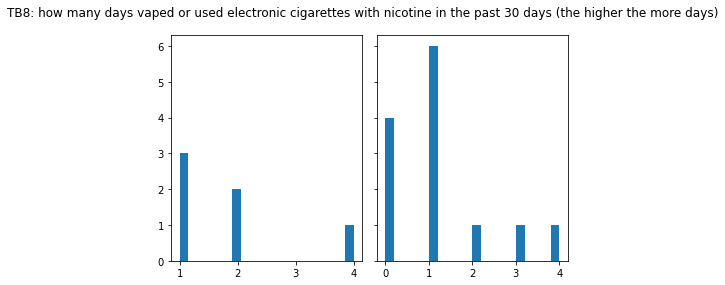

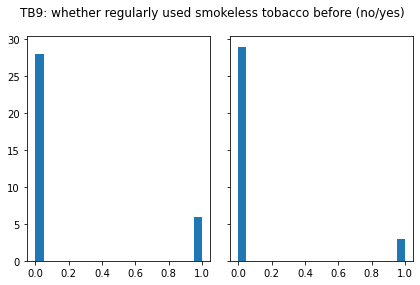

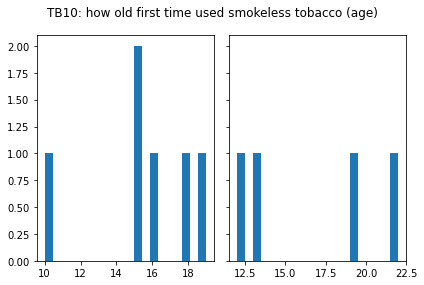

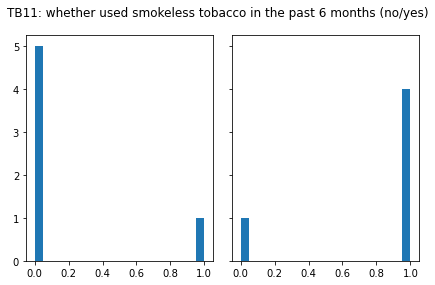

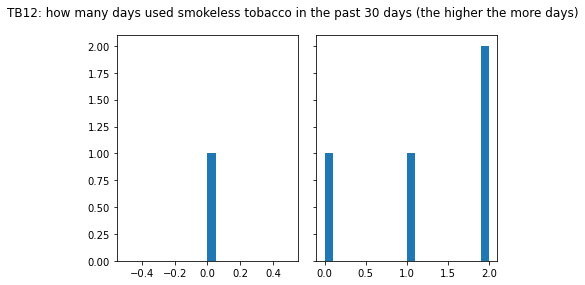

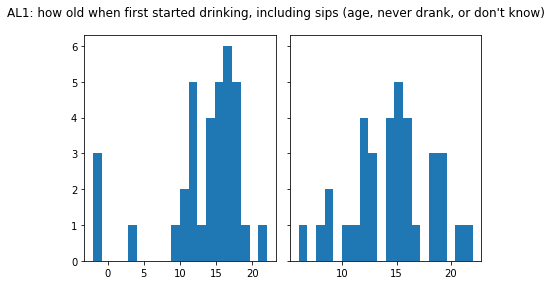

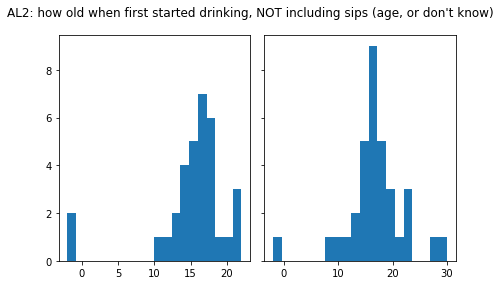

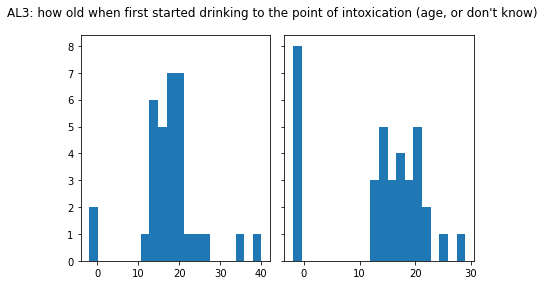

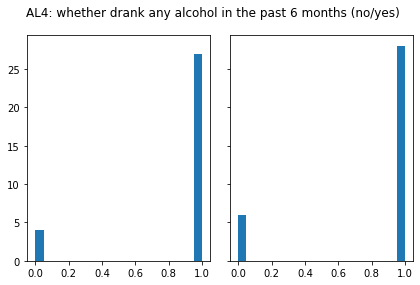

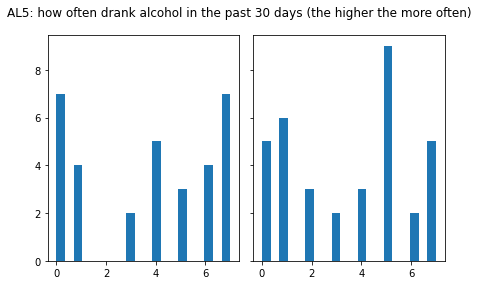

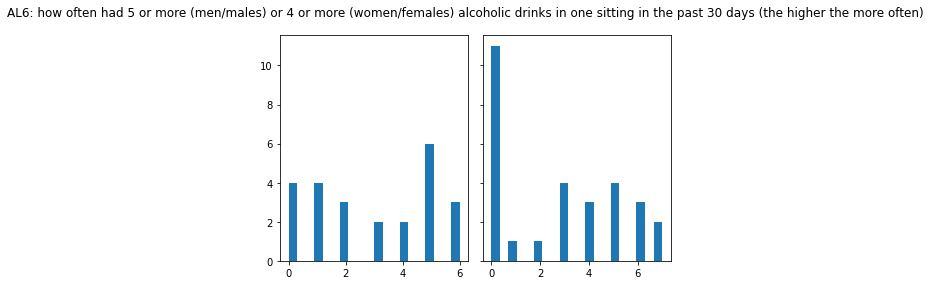

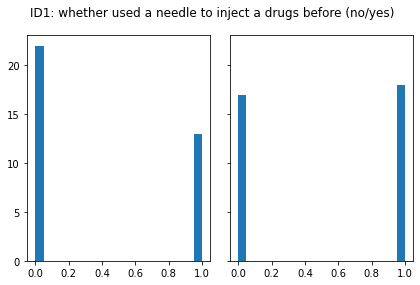

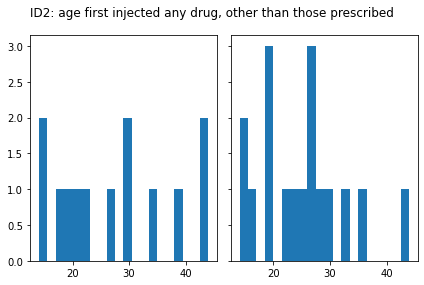

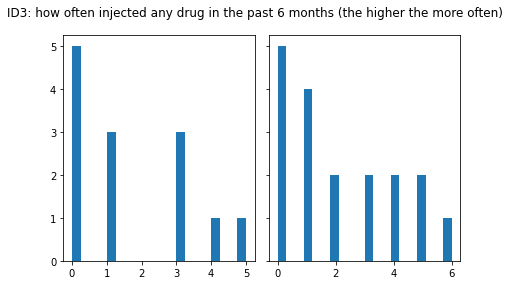

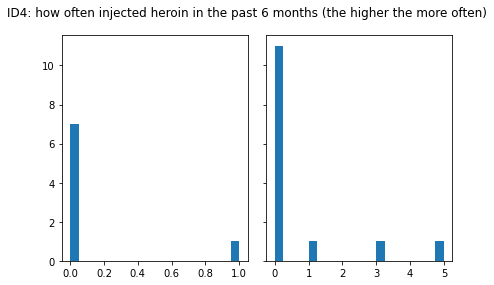

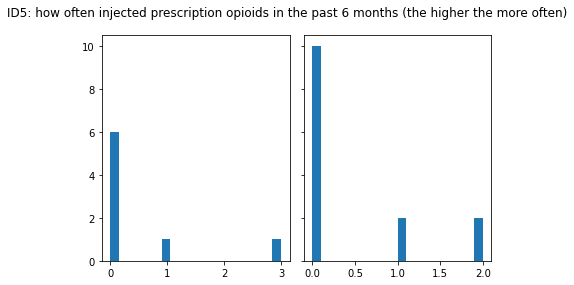

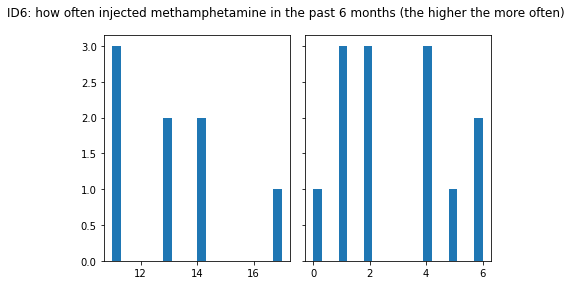

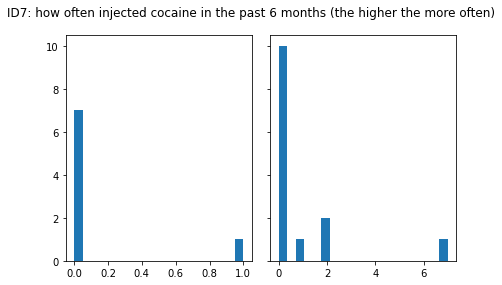

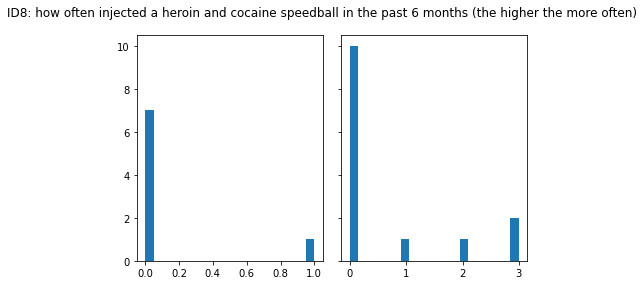

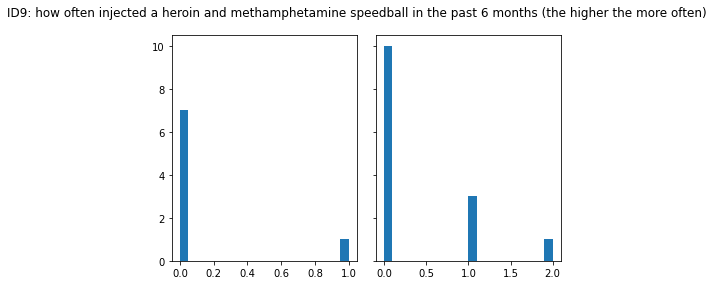

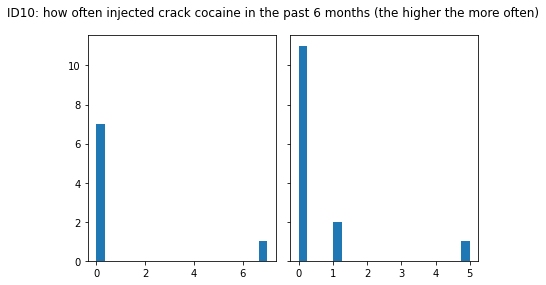

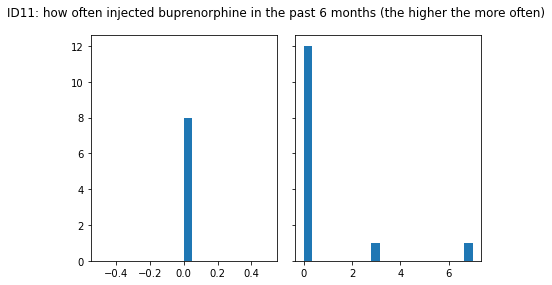

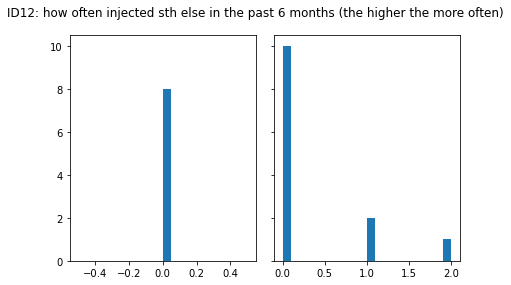

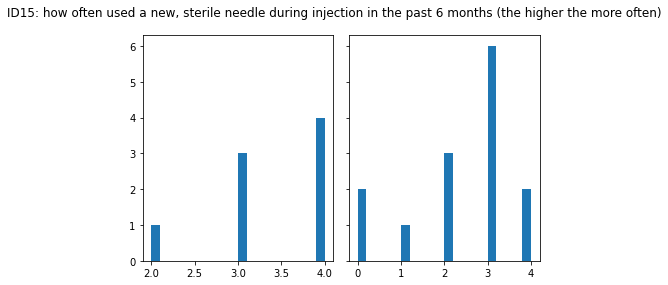

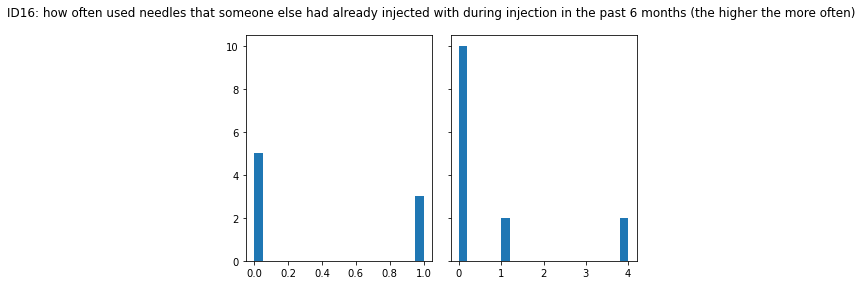

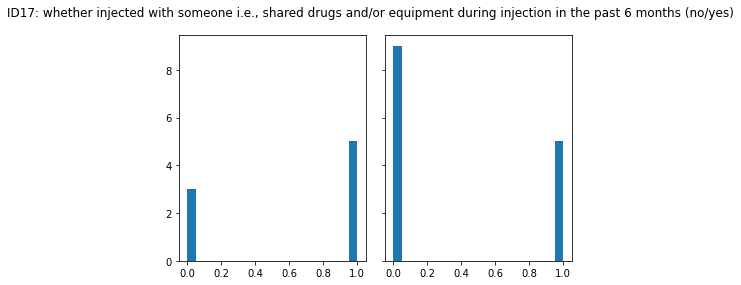

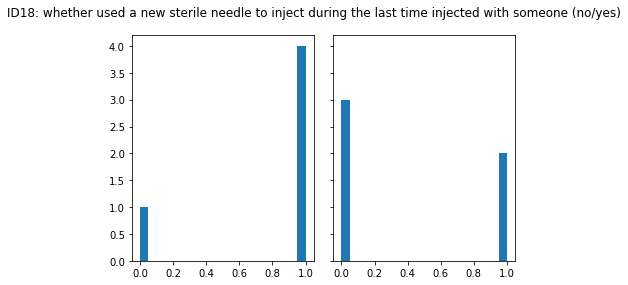

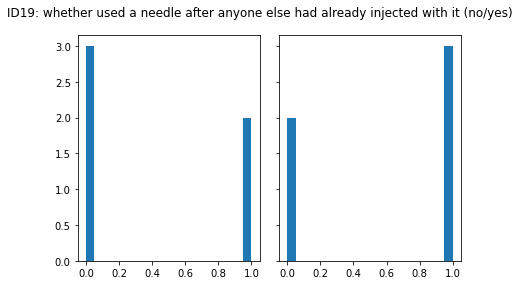

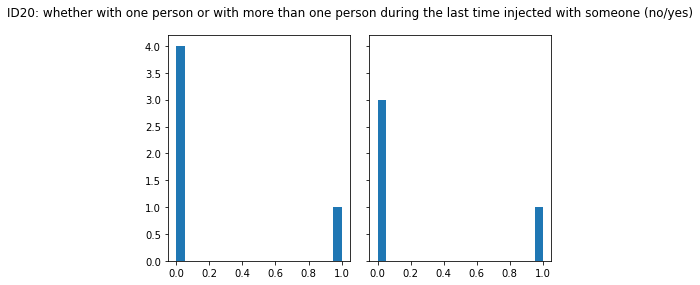

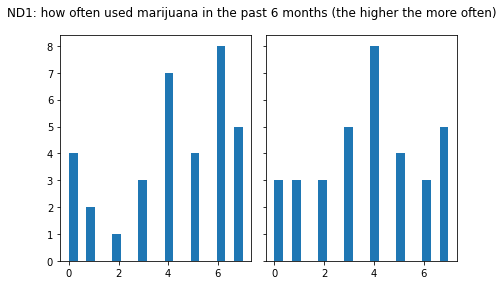

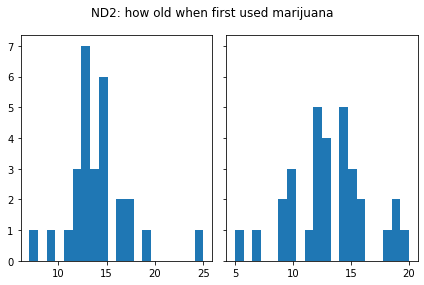

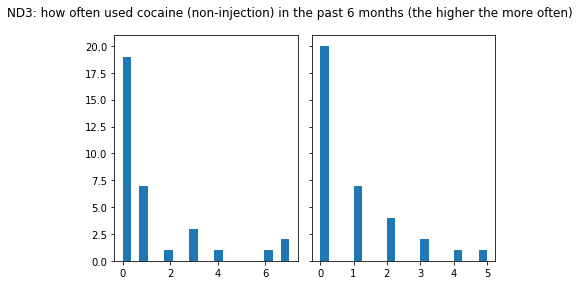

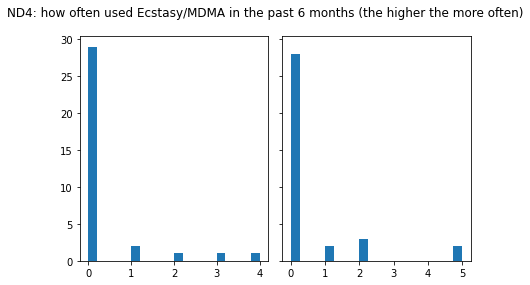

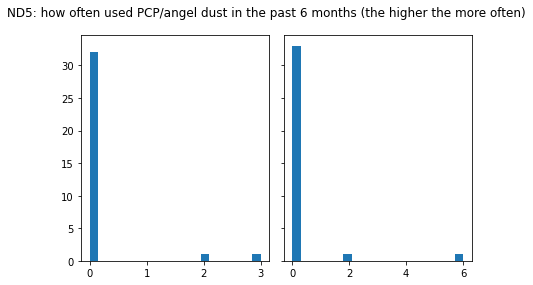

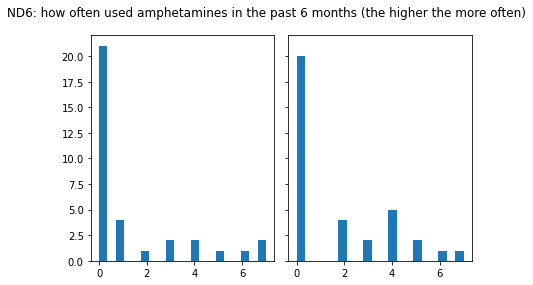

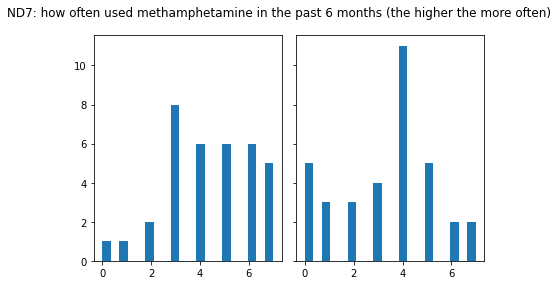

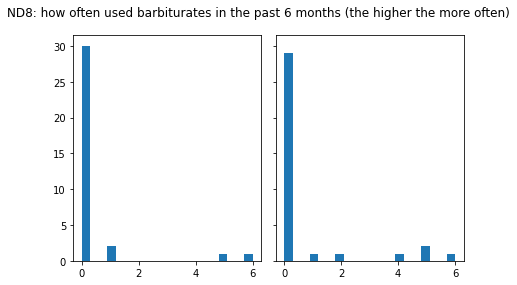

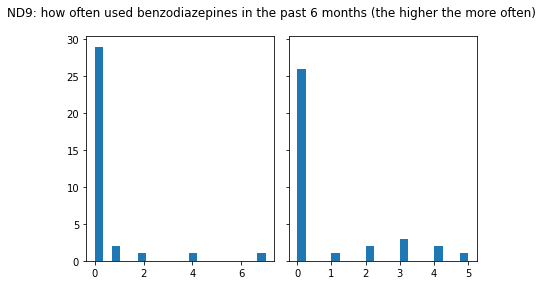

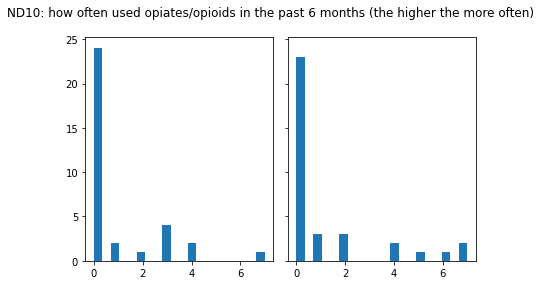

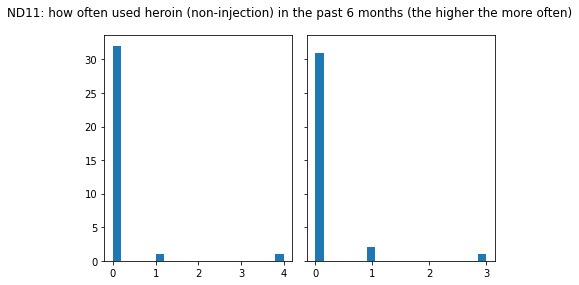

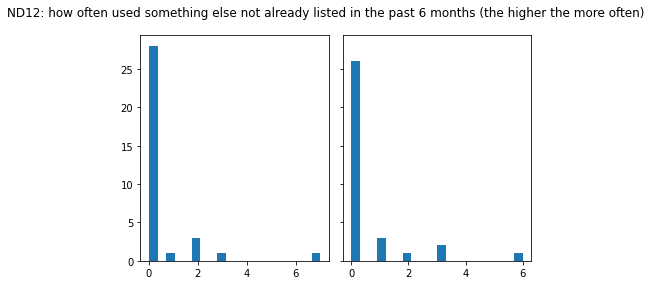

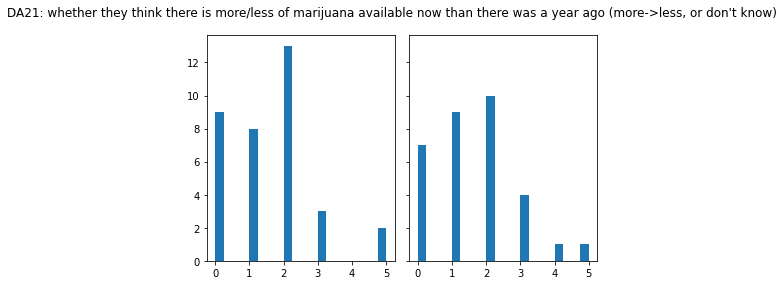

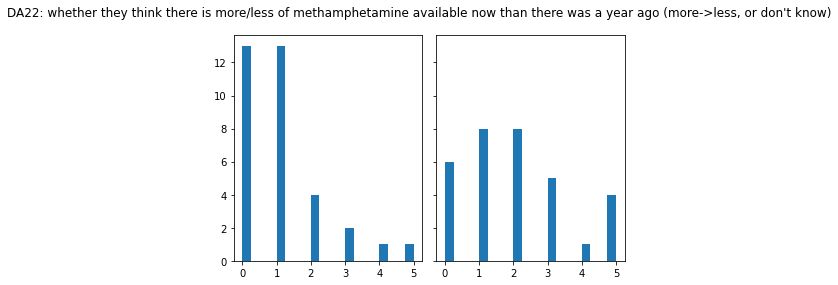

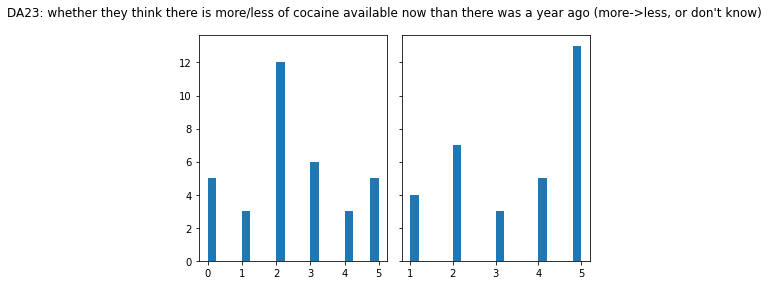

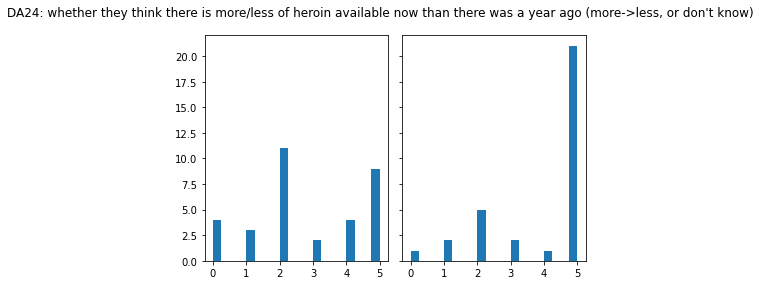

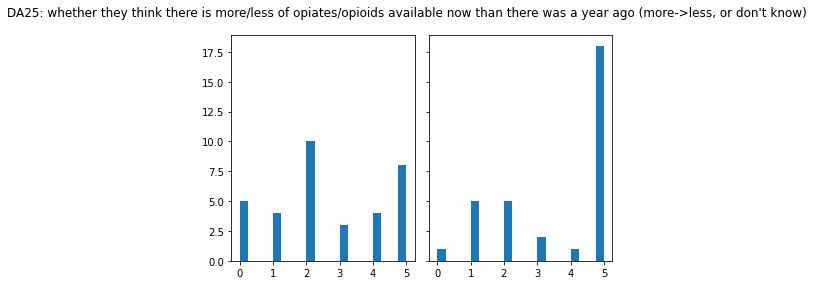

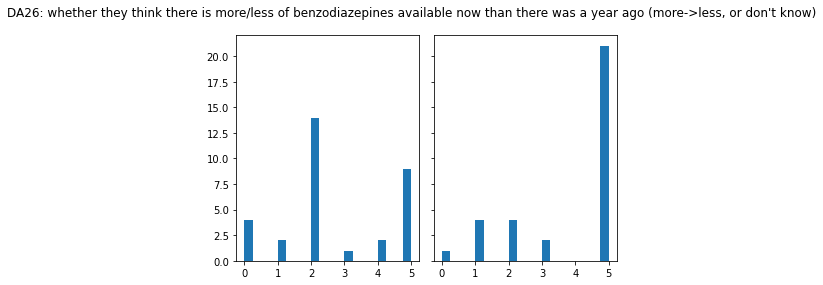

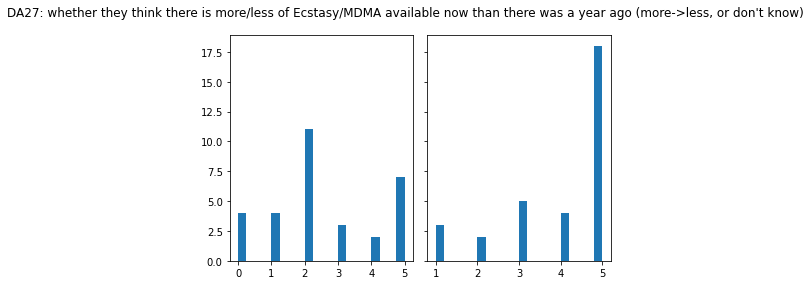

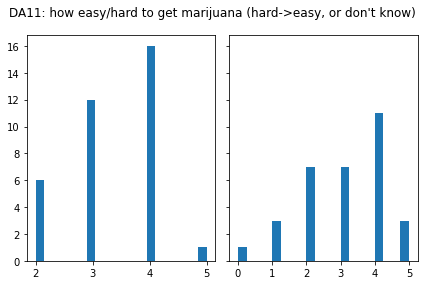

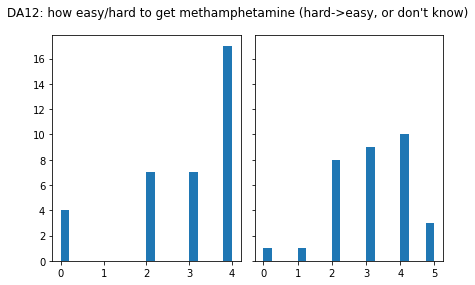

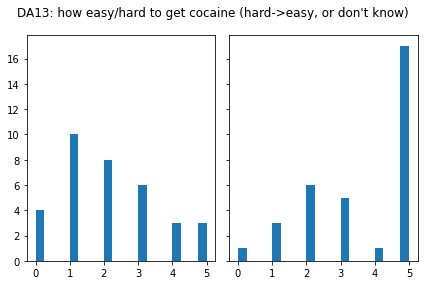

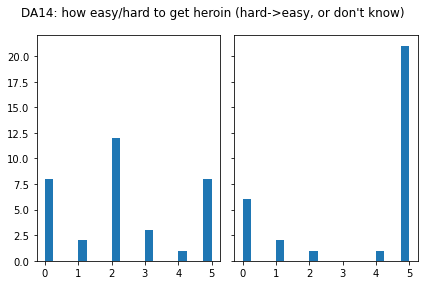

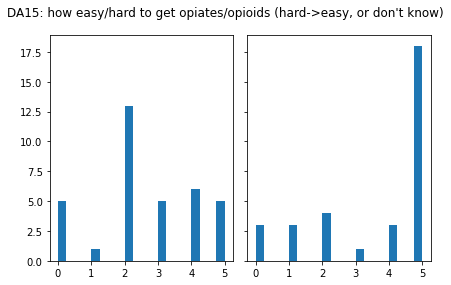

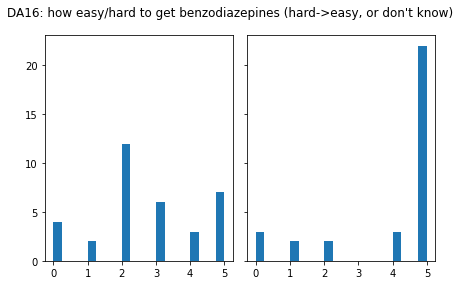

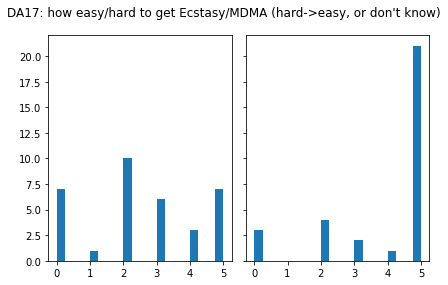

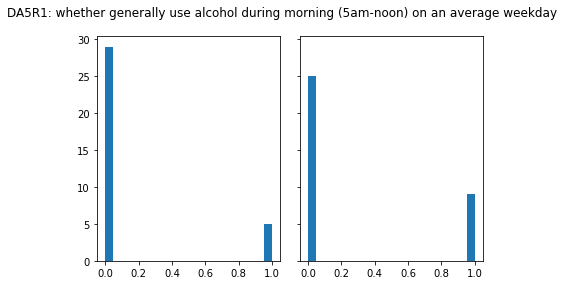

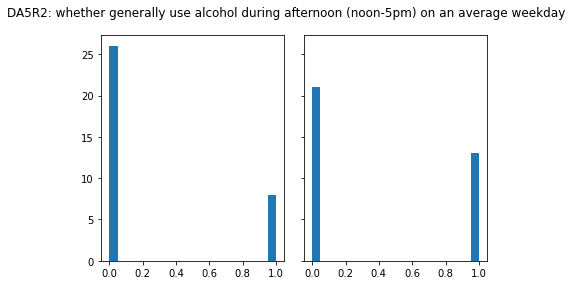

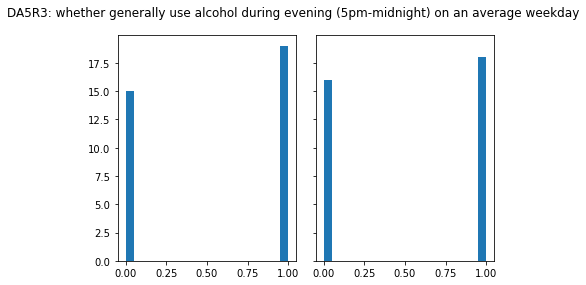

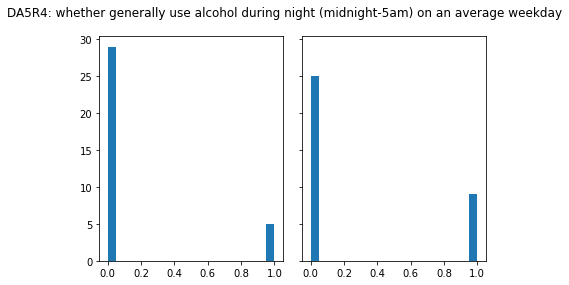

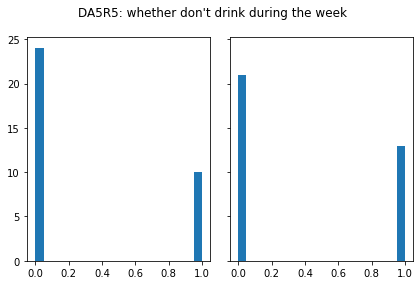

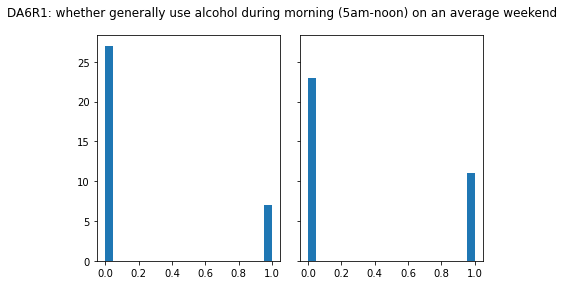

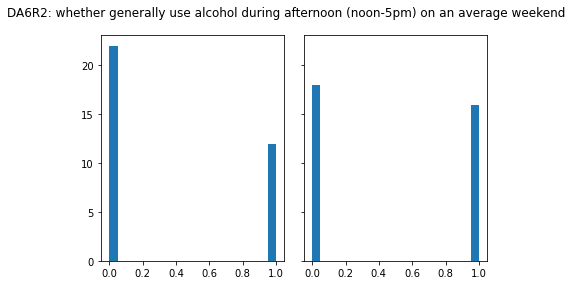

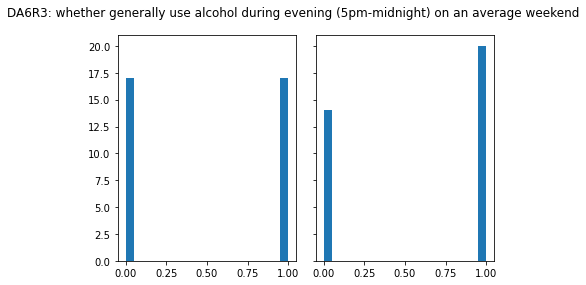

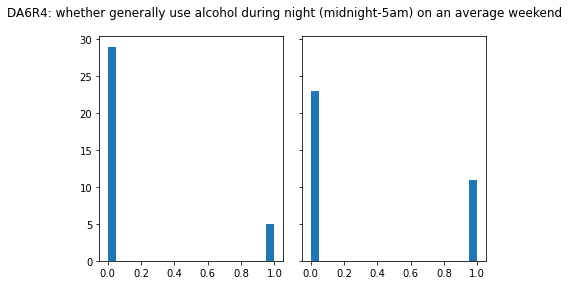

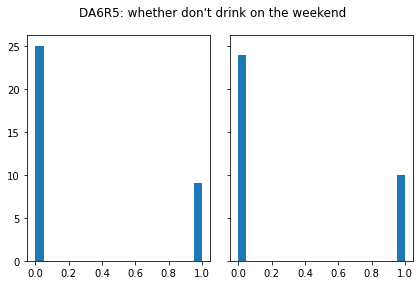

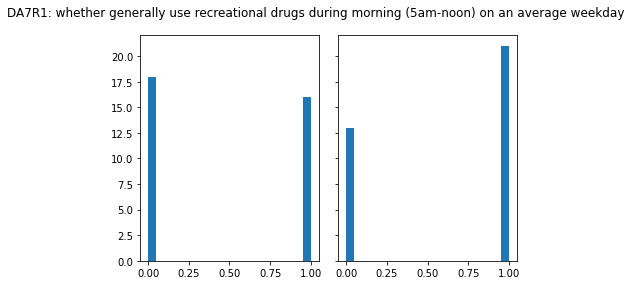

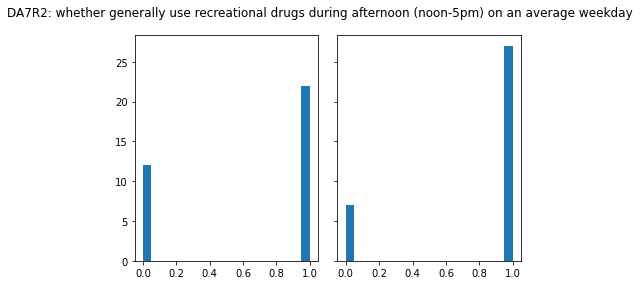

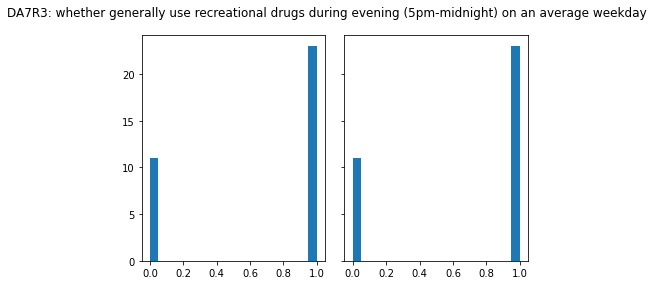

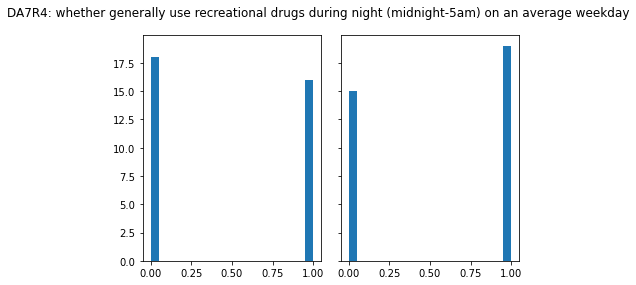

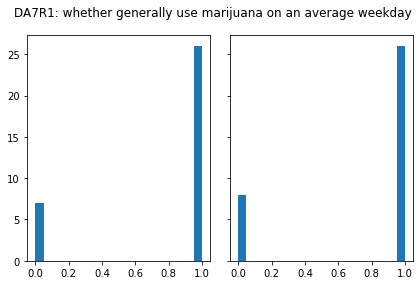

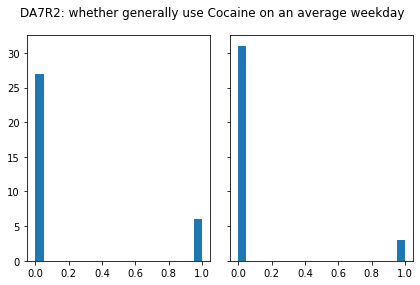

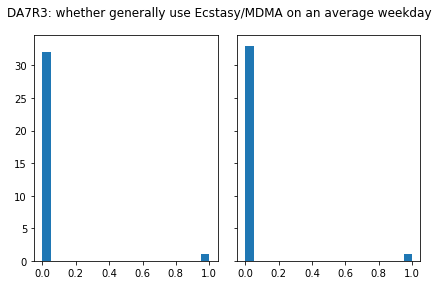

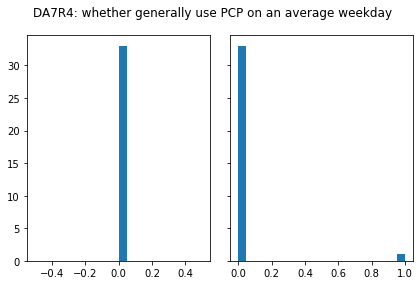

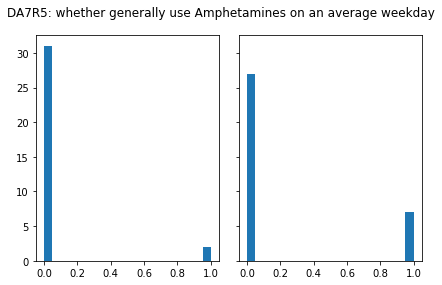

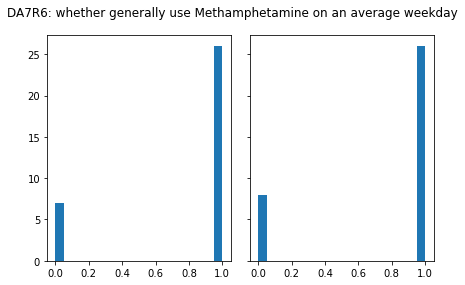

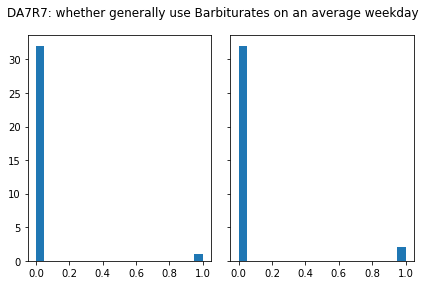

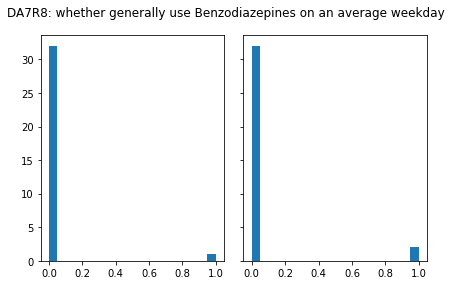

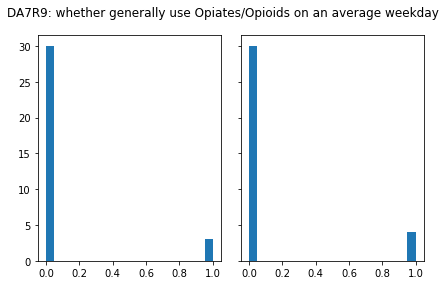

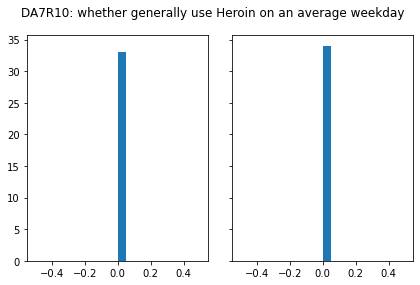

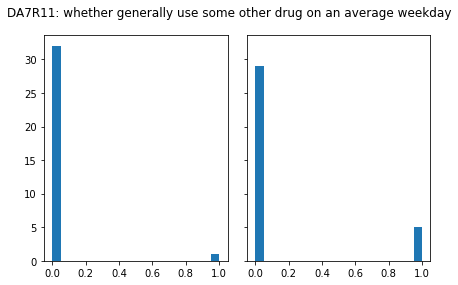

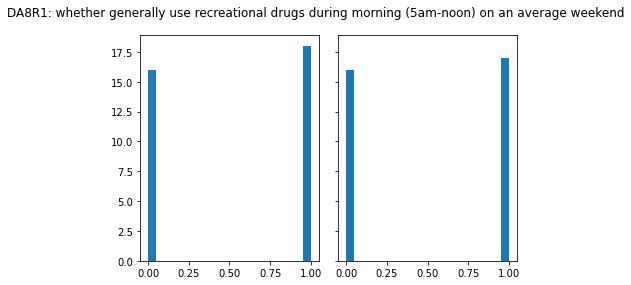

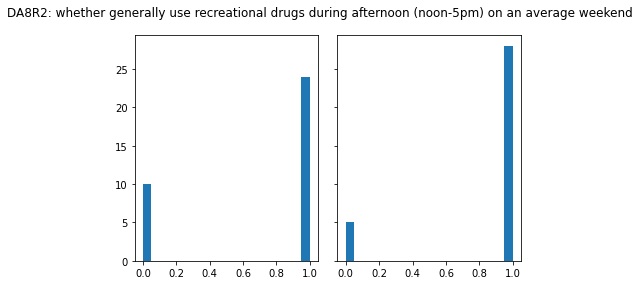

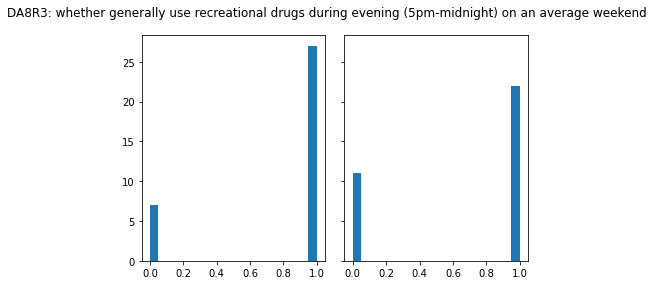

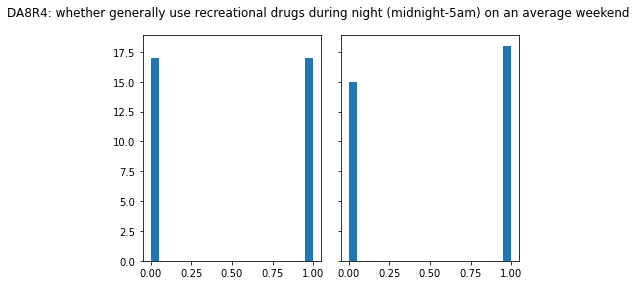

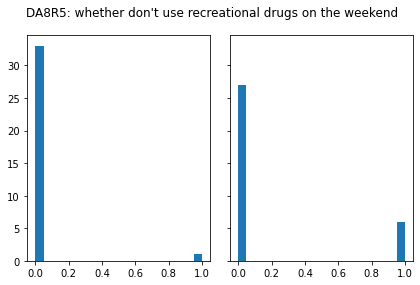

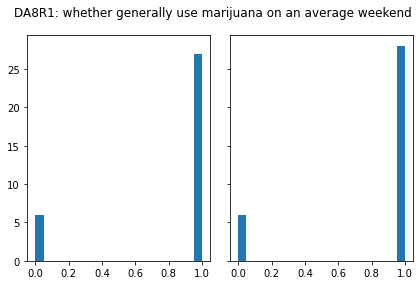

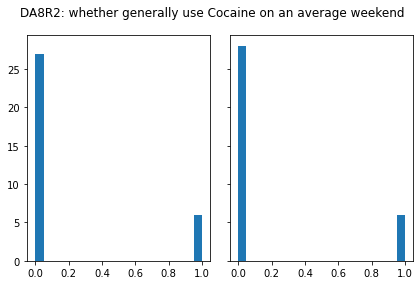

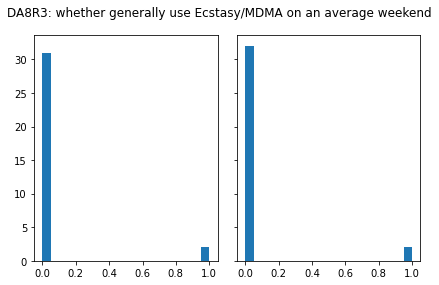

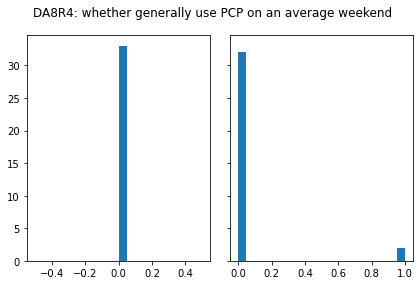

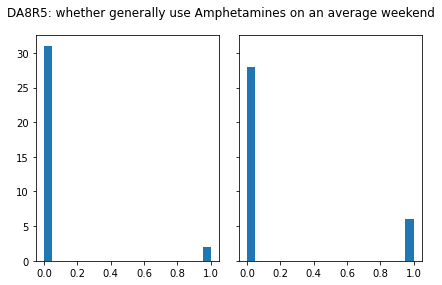

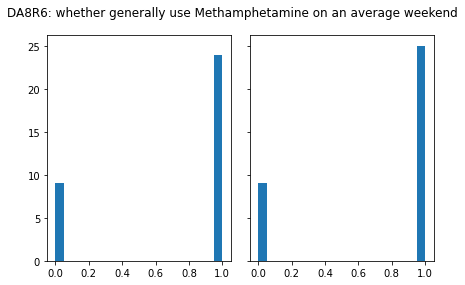

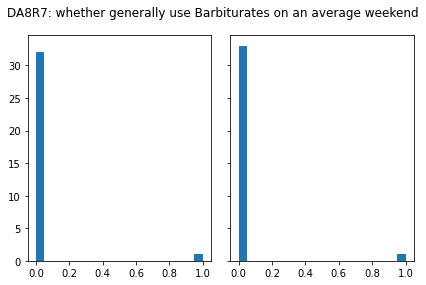

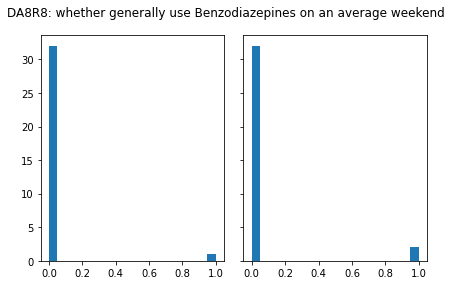

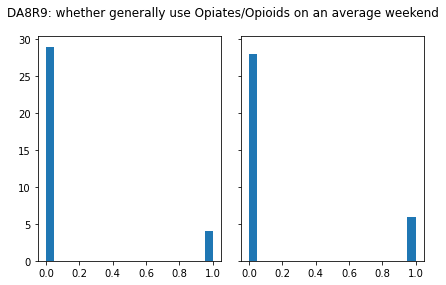

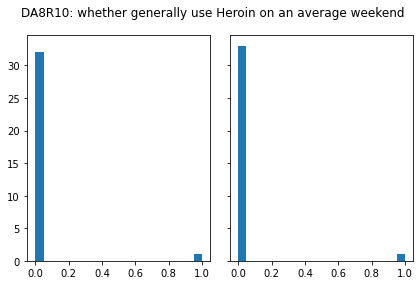

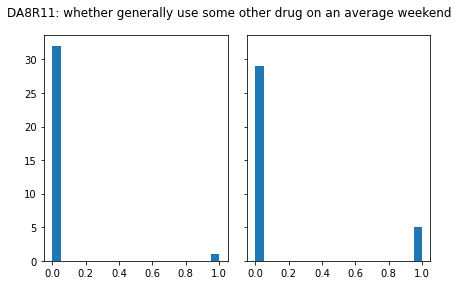

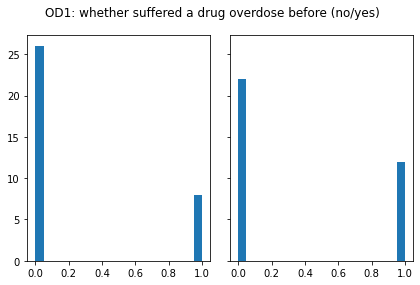

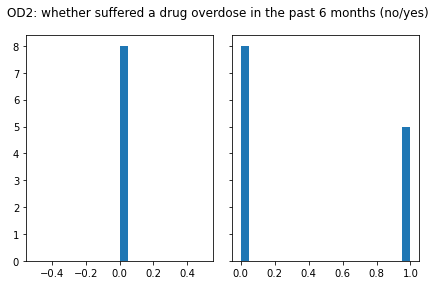

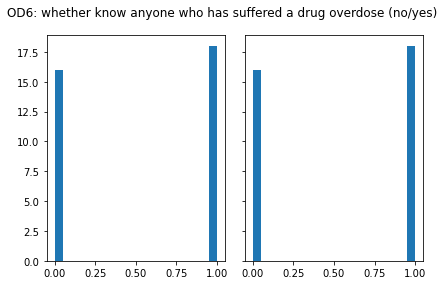

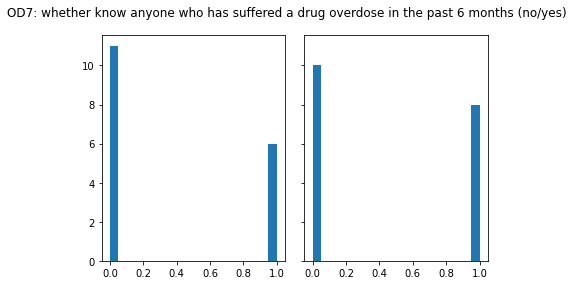

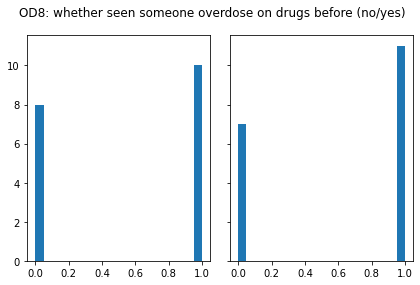

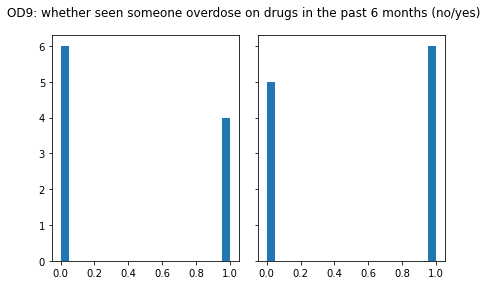

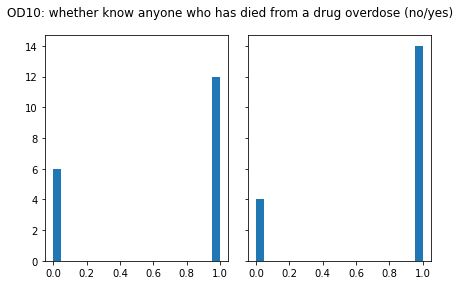

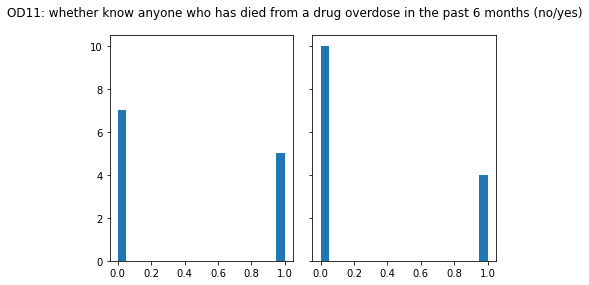

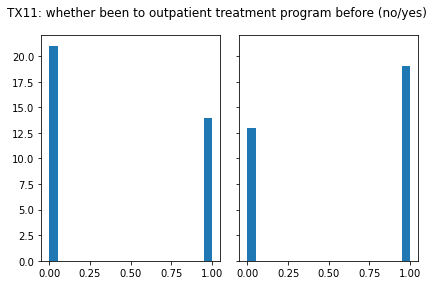

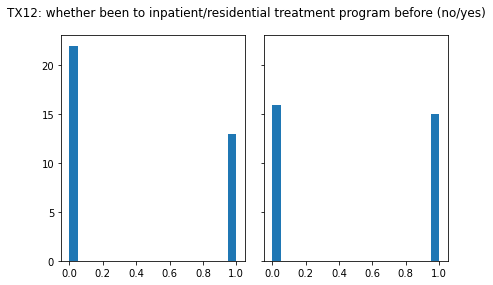

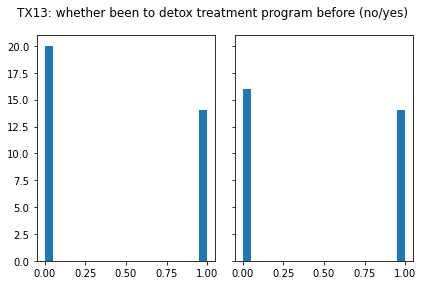

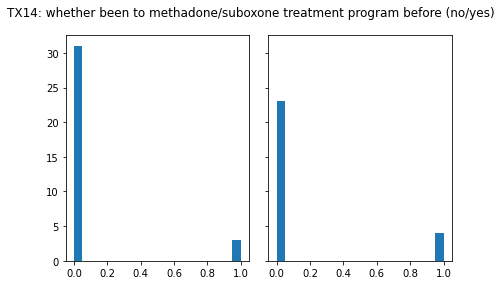

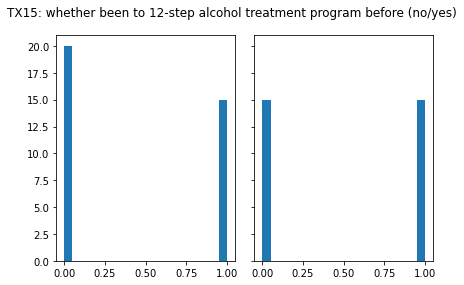

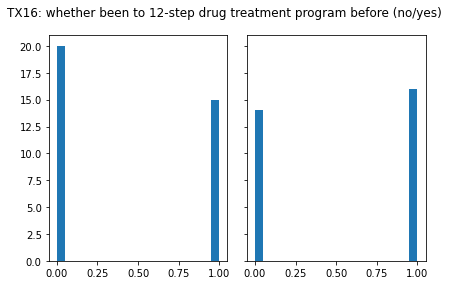

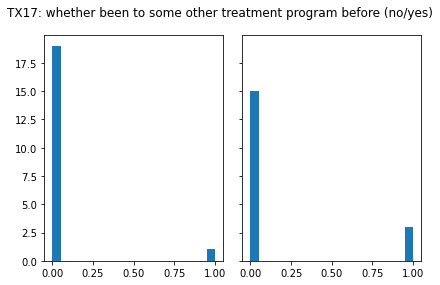

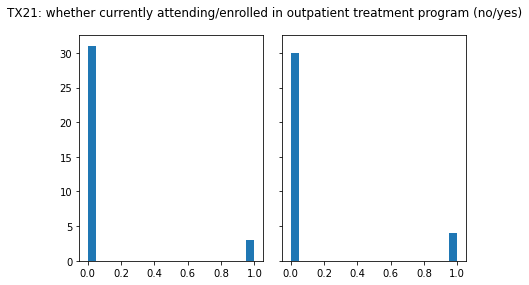

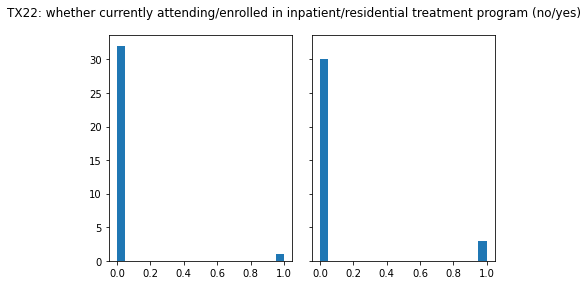

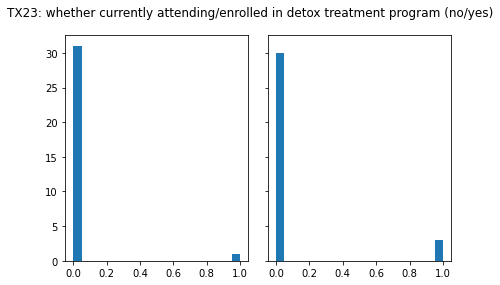

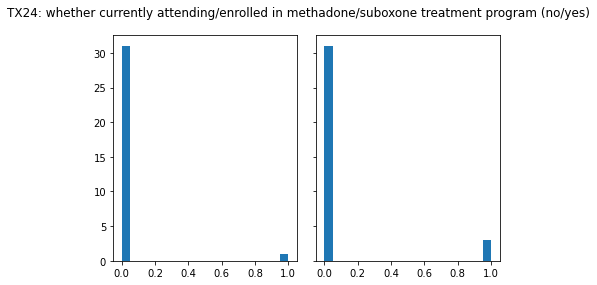

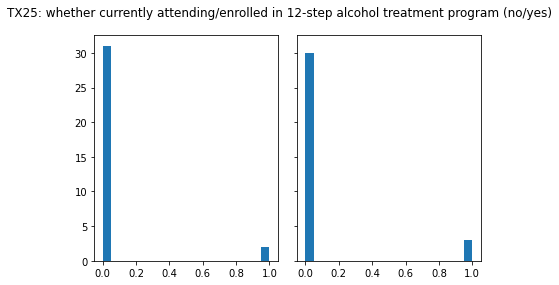

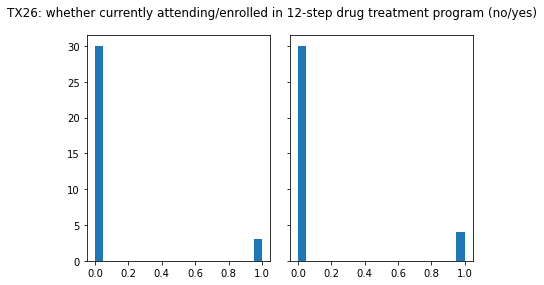

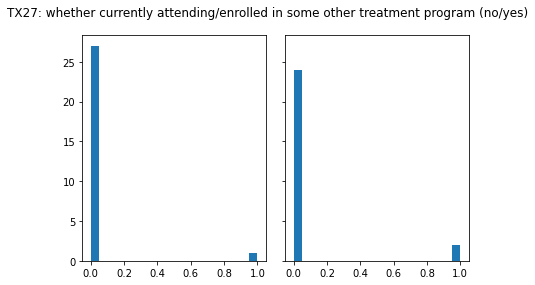

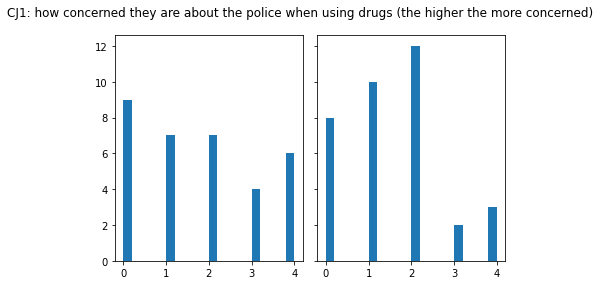

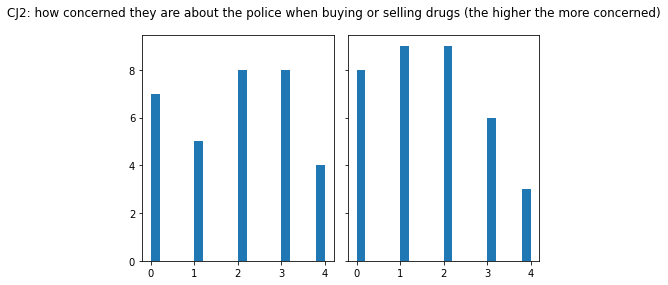

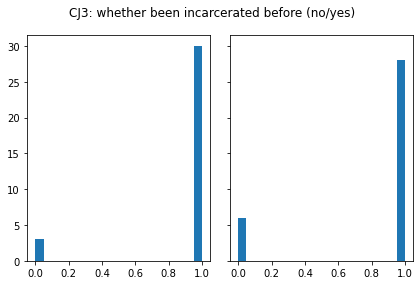

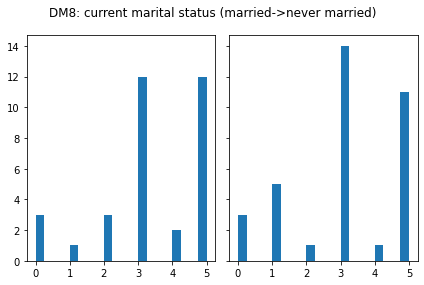

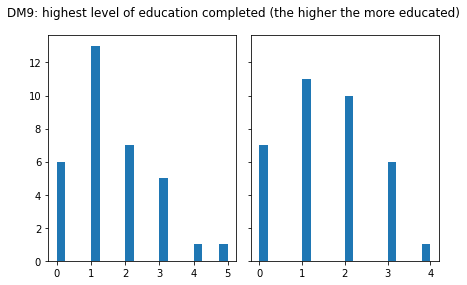

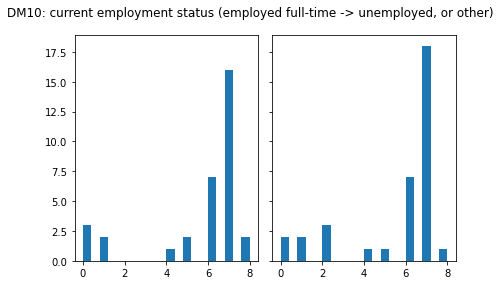

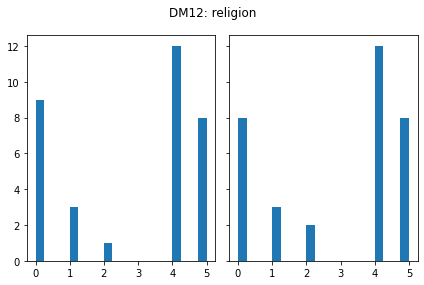

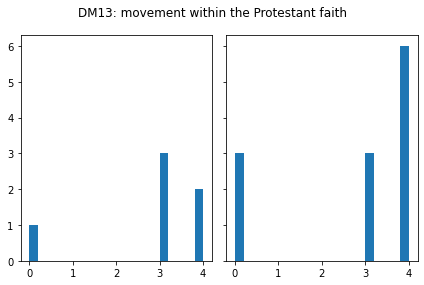

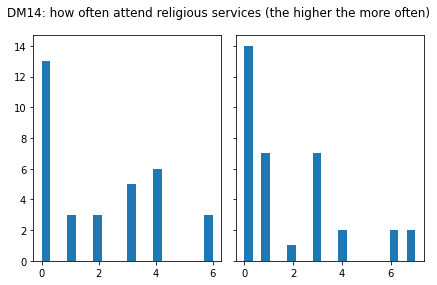

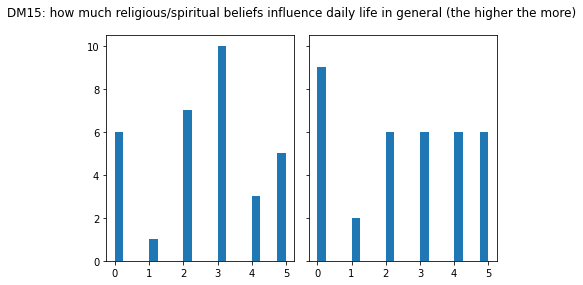

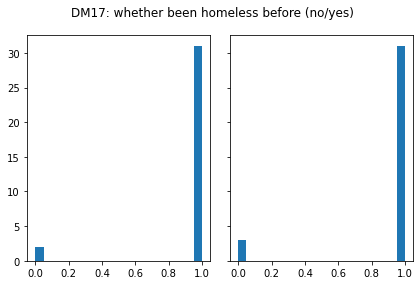

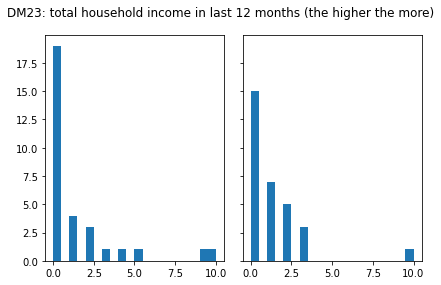

In [31]:
import re
for key in mappings.keys():
    val = mappings[key]
    a = df_C1W1nonet.iloc[:,val[2]]
    b = df_C1W2nonet.iloc[:,val[3]]
    if key[-1] != '^':
        fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
        plt.suptitle(re.sub('[^A-Za-z0-9]+', '', key) + ': ' + val[1])
        axs[0].hist(a,bins=20)
        axs[1].hist(b,bins=20)
    # plt.close(fig)

Corner cases:
- Q36 is combination of AL6A (for men) and AL6B (for women)  --> merge into one AL6 for simplicity
- Variables exclusive to W2:
    - Q70: how old regularly used marijuana
    - Q199: whether been incarcerated in the past 6 months
    - Q208_R4: other branch not listed within the Protestant faith
- DA5-8 <=> Q100-105 (patterns of using alcohol and drugs). W1 has more detailed info on using which drug(s) at specifically which time of the day. In particular, DA7a-d and DA8a-d are supersets of Q103 and Q105, respectively.